# Choropleths

In [ ]:
#!pip install geopandas

In [2]:
import pandas as pd
import numpy as np

import geopandas as gpd

from matplotlib import pyplot as plt

1\. Create a choropleth of the 2016 U.S. presidential election results ("https://dlsun.github.io/pods/data/election2016.csv"), but for U.S. states rather than counties. (Hint: you will need to Google to get the shapefiles for states. You will also need to do some processing of the county results to get state results.)

In [5]:
df_states = gpd.read_file('./cb_2016_us_state_500k.zip')
df_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


(22.0, 50.0)

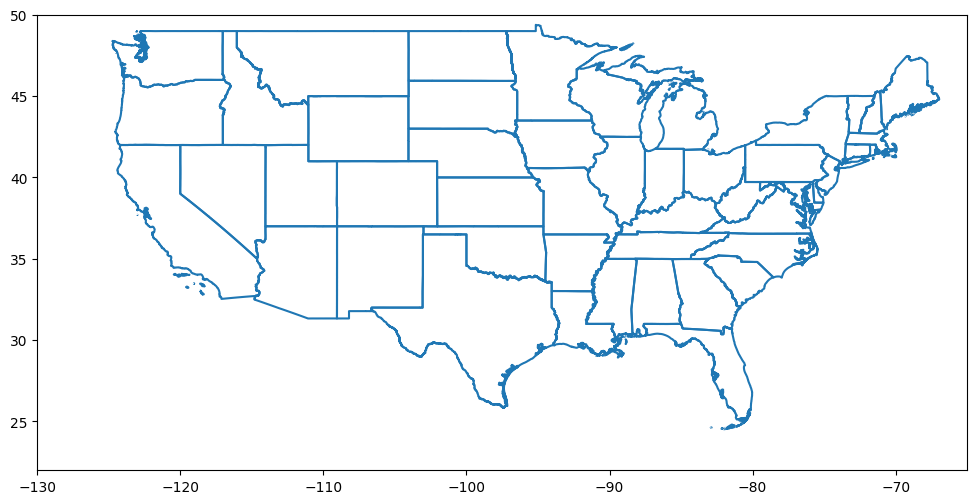

In [7]:
df_states.boundary.plot(figsize=(12, 12))
plt.xlim(-130, -65)
plt.ylim(22, 50)

In [19]:
df_elections = pd.read_csv('https://dlsun.github.io/pods/data/election2016.csv')
df_elections.head()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [23]:
df_elections_state = df_elections.groupby('state_abbr')[['votes_dem', 'votes_gop', 'total_votes']].sum().reset_index()
df_elections_state['per_dem'] = df_elections_state['votes_dem'] / df_elections_state['total_votes']
df_elections_state['per_gop'] = df_elections_state['votes_gop'] / df_elections_state['total_votes']
df_elections_state.head()

,state_abbr,votes_dem,votes_gop,total_votes,per_dem,per_gop
0,AK,2697087.0,3781977.0,7151052.0,0.377159,0.528870
1,AL,718084.0,1306925.0,2078165.0,0.345538,0.628884
2,AR,378729.0,677904.0,1108615.0,0.341624,0.611487
3,AZ,936250.0,1021154.0,2062810.0,0.453871,0.495031
4,CA,7362490.0,3916209.0,11954317.0,0.615885,0.327598


In [28]:
df_all = df_states.merge(df_elections_state, how="left", left_on='STUSPS', right_on='state_abbr')
df_all.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state_abbr,votes_dem,votes_gop,total_votes,per_dem,per_gop
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",AL,718084.0,1306925.0,2078165.0,0.345538,0.628884
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344...",AK,2697087.0,3781977.0,7151052.0,0.377159,0.528870
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",AZ,936250.0,1021154.0,2062810.0,0.453871,0.495031
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",AR,378729.0,677904.0,1108615.0,0.341624,0.611487
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",CA,7362490.0,3916209.0,11954317.0,0.615885,0.327598


In [26]:
print(len(df_all), len(df_states), len(df_elections_state))

56 56 51


In [29]:
missing_data = df_all[df_all.per_dem.isnull()].STATEFP.value_counts()

missing_data

60    1
72    1
66    1
69    1
78    1
Name: STATEFP, dtype: int64

In [30]:
df_all = df_all[~df_all["STATEFP"].isin(missing_data.index)]

(22.0, 50.0)

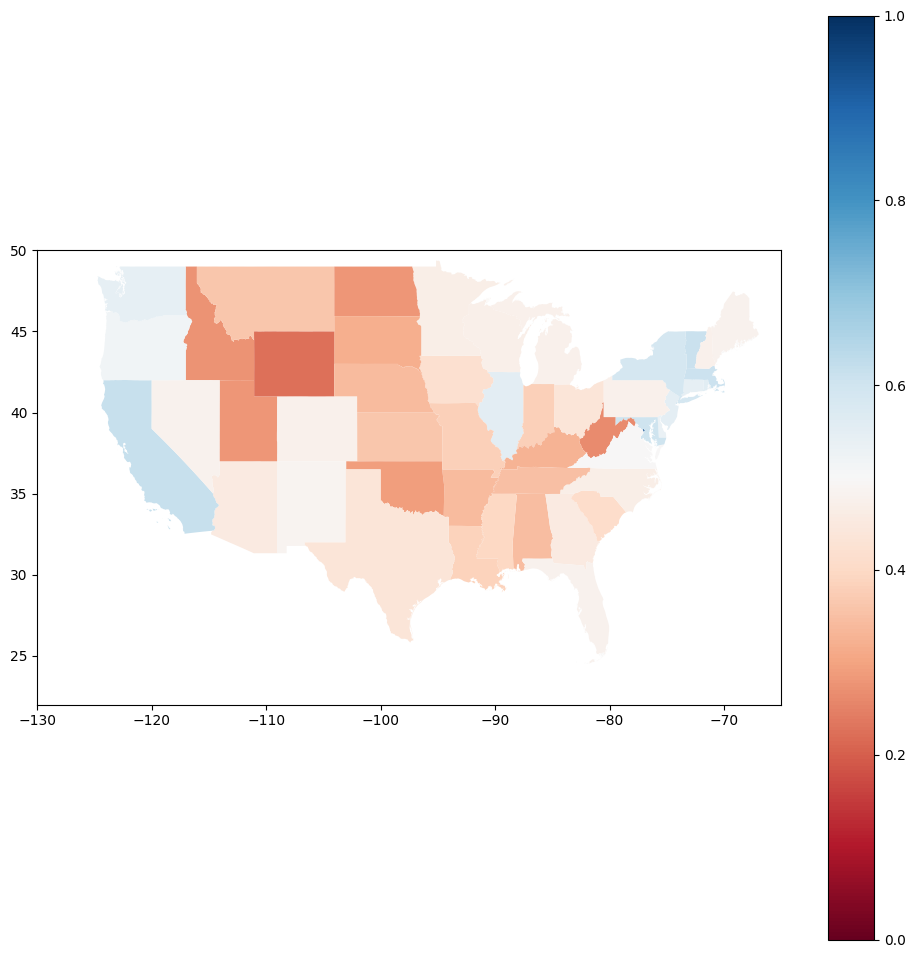

In [33]:
df_all.plot(column = "per_dem", cmap = "RdBu", legend=True, figsize = (12, 12), vmin=0, vmax=1)
plt.xlim(-130, -65)
plt.ylim(22, 50)

2\. When creating a world map using `gpd.datasets.get_path('naturalearth_lowres')`, you might have noticed a warning that this functionality is deprecated. The shortcut might go away, but you can still download the shapefiles directly from the [Natural Earth website](https://www.naturalearthdata.com/downloads/). Read in the shape files directly (that is, without using `gdp.datasets.get_path`). Then make a choropleth showing GDP per capita for each country. Try different projections, color schemes, etc. (Hint: GDP and population variables are included in the shapefiles; can you find them?)

Note: I got an error when I tried to read the zipfile directly from Natural Earth, so I needed to download the zipfile, upload to Colab, then read in. If you figure out how to read directly from Natural Earth, please share in Discord!

In [ ]:
# ENTER YOUR CODE HERE. ADD CELLS AS NEEDED

3\. These notebooks provided just a brief introduction to maps and geospatial data. Take some time to investigate online and experiment with what you can do in Python or with Plotly. Then create an interesting map of you own and share it in Discord!

In [ ]:
# ENTER YOUR CODE HERE. ADD CELLS AS NEEDED